<a href="https://colab.research.google.com/github/debangana97/Data-science-works/blob/main/Breast_cancer_diagnosis_using_PCA_two_ways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer (Wisconsin) Dataset**
###**Principal Component Analysis**

####**Clustering and Classification**

In [1]:
#Mounting google drive to colab to fetch the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the breast cancer wisconsin(diagnostic) dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Breast cancer data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#removing the unnecessary columns
exclude = ['Unnamed: 32','id']
data = data.drop(exclude, axis = 1)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
#checking for the presence of missing values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


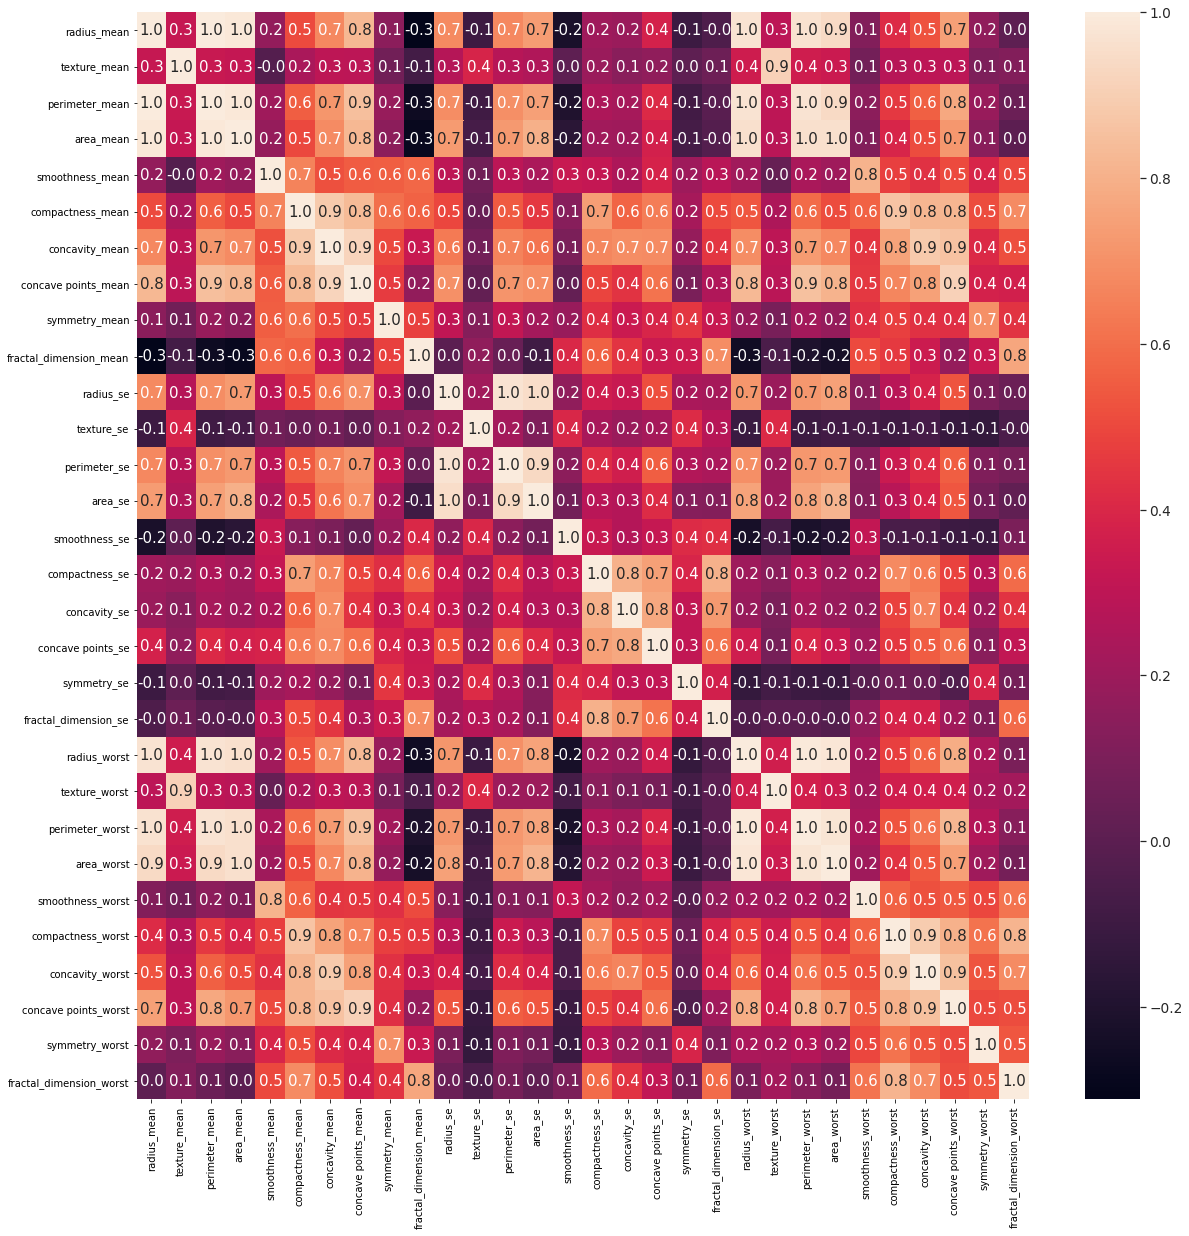

In [7]:
#plotting a heatmap to learn about the correlations
f, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=1.25)
sns.heatmap(data.corr(), annot= True, fmt='.1f')
plt.show()

B    357
M    212
Name: diagnosis, dtype: int64


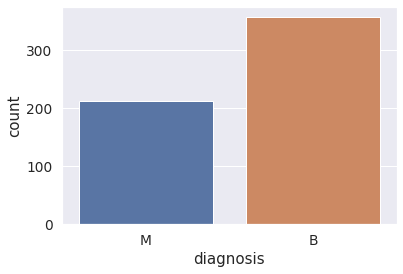

In [8]:
#checking the balance in the dataset
sns.countplot(x='diagnosis', data=data)
freq = data['diagnosis'].value_counts()
print(freq)

In [9]:
#splitting into matrix of features X and target variable Y
y = data.diagnosis
x = data.iloc[:,1:31]

In [10]:
print(y)
y.describe()

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [11]:
print(x)

     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [12]:
#splitting into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)   #20% of the data is used for testing while 80% serves as training data

In [13]:
print(x_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [14]:
#standardization or feature scaling of the matrix of features X which does both centering and normalizing of the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [15]:
print(np.mean(x_train_std))
print(np.std(x_train_std))

4.021203394686281e-17
1.0


After standardization, the mean of the data = 0 and variance = 1

### **PCA using eigen values and their projection on 2D plane**

In [16]:
#Finding the covariance matrix which is M^T*M
cov_matrix = np.matmul(x_train_std.T, x_train_std)
print('The dimension of the covariance matrix is: ', cov_matrix.shape)

The dimension of the covariance matrix is:  (30, 30)


In [17]:
#finding the top 2 eigen values and corresponding eigen vectors
from scipy.linalg import eigh
ev = eigh(cov_matrix, eigvals_only=True)
print(ev)

#eigh will return eigen values in ascending order
e_values_1, e_vectors_1 = eigh(cov_matrix, eigvals = (28,29))

#generates only the largest and the second largest eigen values which are (28,29) for visualization
print('The shape of the eigen vectors is: ', e_vectors_1.shape)
e_vectors_1 = e_vectors_1.T

#converting into 2D shape for ease
print('Changed shape of eigen vectors is: ', e_vectors_1.shape)

[5.07658288e-02 3.45628144e-01 6.31318056e-01 2.95047757e+00
 3.56946759e+00 7.46170929e+00 7.93182141e+00 9.88643850e+00
 1.19909099e+01 1.35764022e+01 1.44886240e+01 2.05315914e+01
 2.32893984e+01 2.72518819e+01 3.61151946e+01 4.25228128e+01
 7.57997663e+01 1.05301440e+02 1.22464429e+02 1.38160146e+02
 1.58352498e+02 1.90658101e+02 2.06482551e+02 2.93373168e+02
 5.55776045e+02 7.70194650e+02 9.11500669e+02 1.27651670e+03
 2.69452564e+03 5.92829976e+03]
The shape of the eigen vectors is:  (30, 2)
Changed shape of eigen vectors is:  (2, 30)


In [18]:
#projecting the data on the 2D plane
new_coordinates_1 = np.matmul(e_vectors_1, x_train_std.T)
print('The shape of the resultant new data points is: ', e_vectors_1.shape,'X',x_train_std.T.shape, '=', new_coordinates_1.shape)

The shape of the resultant new data points is:  (2, 30) X (30, 455) = (2, 455)


In [19]:
#appending labels to the 2D projected data
new_coordinates_1 = np.vstack((new_coordinates_1, y_train)).T

#creating a new dataframe for plotting the labelled points
plot_df = pd.DataFrame(data=new_coordinates_1, columns=('1st Principal', '2nd Principal', 'Labels'))
print(plot_df.head())

  1st Principal 2nd Principal Labels
0       1.10667       3.03916      B
1      0.400452       2.28231      B
2      -1.99544        1.0841      B
3      0.179338        2.5611      B
4      -1.01762       2.84831      B


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


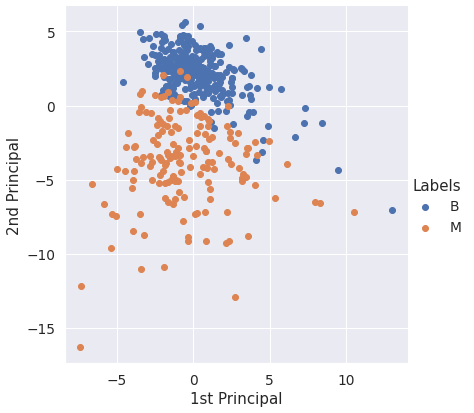

In [20]:
#plotting 2D datapoints 
sns.FacetGrid(plot_df, hue='Labels', size=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

In [21]:
#Presenting data on the plane of the second and third component

e_values_2, e_vectors_2 = eigh(cov_matrix, eigvals = (27,28))
#generates only the second largest and the third largest eigen values which are (27,28) for visualization

print('The shape of the eigen vectors is: ', e_vectors_2.shape)

e_vectors_2 = e_vectors_2.T
#converting into 2D shape for easiness
print('Changed shape of eigen vectors is: ', e_vectors_2.shape)

The shape of the eigen vectors is:  (30, 2)
Changed shape of eigen vectors is:  (2, 30)


In [22]:
#projecting the data on the 2D plane of 1st and 3rd components
new_coordinates_2 = np.matmul(e_vectors_2, x_train_std.T)
print('The shape of the resultant new data points is: ', e_vectors_2.shape,'X',x_train_std.T.shape, '=', new_coordinates_2.shape)

The shape of the resultant new data points is:  (2, 30) X (30, 455) = (2, 455)


In [23]:
#appending labels to the 2D projected data
new_coordinates_2 = np.vstack((new_coordinates_2, y_train)).T

#creating a new dataframe for plotting the labeled points
plot_df_2 = pd.DataFrame(data=new_coordinates_2, columns=('2nd Principal', '3rd Principal', 'Labels'))
print(plot_df_2.head())

  2nd Principal 3rd Principal Labels
0       0.40852       1.10667      B
1      0.263275      0.400452      B
2      -1.19354      -1.99544      B
3       1.08528      0.179338      B
4      -0.84729      -1.01762      B


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


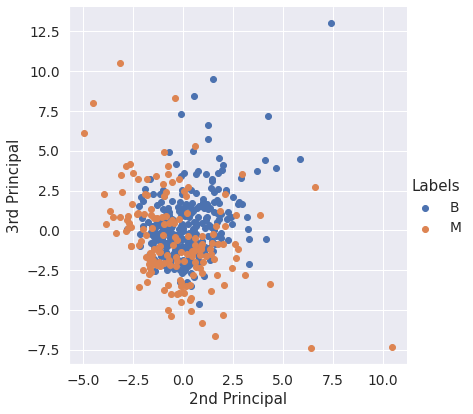

In [24]:
#plotting 2D datapoints 
sns.FacetGrid(plot_df_2, hue='Labels', size=6).map(plt.scatter, '2nd Principal', '3rd Principal').add_legend()
plt.show()

### **PCA using scikit-learn directly**

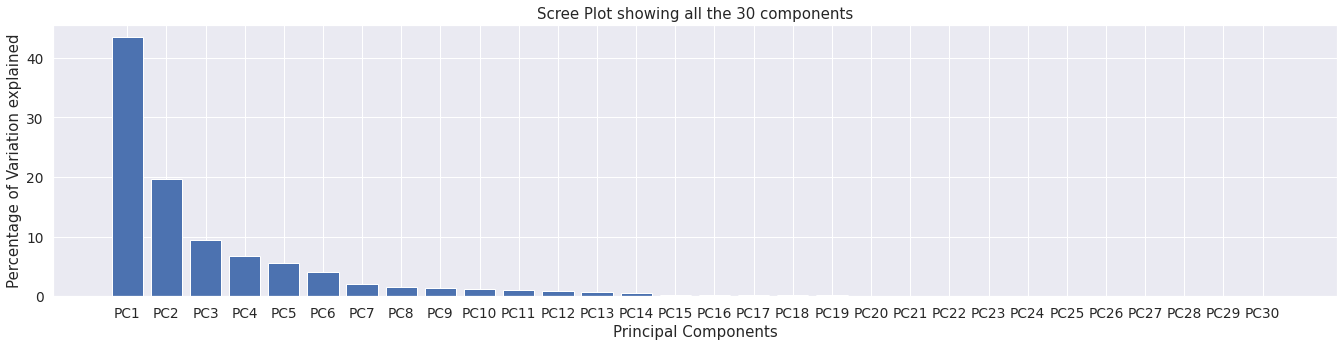

In [25]:
#performing the principal component analysis with all 30 components
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_train_std)

#now based on the scree plot we see how many principal components are actually needed
percent_var = np.round(pca.explained_variance_ratio_*100, decimals=1)   #calculating the percentage of variation that each principal component accounts for
labels = ['PC'+str(p) for p in range(1,len(percent_var)+1)]

#plotting the graph to see contribution of each principal component
f, ax = plt.subplots(figsize=(23,5))
plt.bar(x=range(1,len(percent_var)+1), height=percent_var, tick_label=labels)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variation explained')
plt.title('Scree Plot showing all the 30 components')
plt.show()

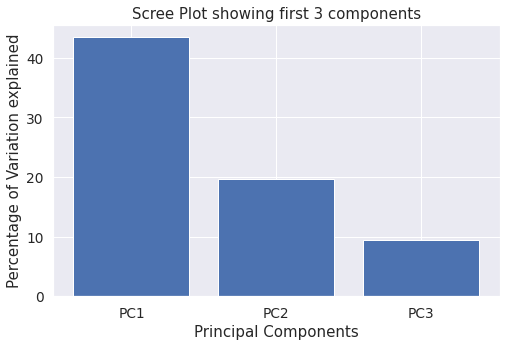

In [26]:
#performing the principal component analysis with 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(x_train_std)

#now based on the scree plot we see how many principal components are actually needed
percent_var = np.round(pca.explained_variance_ratio_*100, decimals=1)   #calculating the percentage of variation that each principal component accounts for
labels = ['PC'+str(p) for p in range(1,len(percent_var)+1)]

#plotting the graph to see contribution of each principal component
f, ax = plt.subplots(figsize=(8,5))
plt.bar(x=range(1,len(percent_var)+1), height=percent_var, tick_label=labels)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variation explained')
plt.title('Scree Plot showing first 3 components')
plt.show()

In [27]:
explained_var = pca.explained_variance_ratio_
explained_var

array([0.43430767, 0.19740115, 0.09351771])

In [28]:
cum_var = np.cumsum(np.round(explained_var, decimals = 3))
cum_var_perc = cum_var*100

In [29]:
#creating a dataframe with the components
pc_df = pd.DataFrame(['PC1','PC2', 'PC3'], columns=['PC'])
explained_var_df = pd.DataFrame(explained_var, columns=['Explained variance'])
cum_var_df = pd.DataFrame(cum_var_perc, columns=['Cumulative variance (in %)'])

In [30]:
total_var_explained = pd.concat([pc_df, explained_var_df, cum_var_df], axis=1)
total_var_explained

,PC,Explained variance,Cumulative variance (in %)
0,PC1,0.434308,43.4
1,PC2,0.197401,63.1
2,PC3,0.093518,72.5


In [31]:
#transforming the data to the reduced dimension data
#this is the data that we are going to work with during the analysis

pca_data = pca.fit_transform(x_train_std)
print('The reduced data is of the dimension: ', pca_data.shape)

The reduced data is of the dimension:  (455, 3)


  1st Principal 2nd Principal Labels
0      -3.03916       1.10667      B
1      -2.28231      0.400452      B
2       -1.0841      -1.99544      B
3       -2.5611      0.179338      B
4      -2.84831      -1.01762      B


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


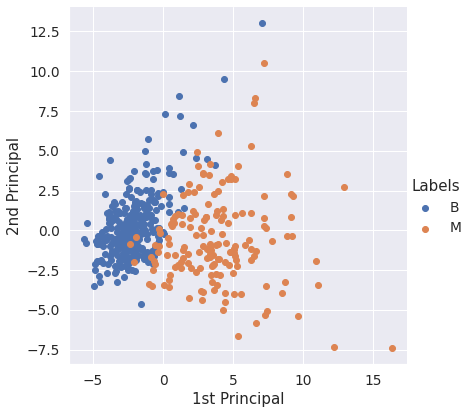

In [32]:
#appending labels to the 2D projected data
#using just 2 principal components for the ease of visualization

pca_1 = PCA(n_components=2)
pca_data_1 = pca_1.fit_transform(x_train_std)
pca_data_1 = np.vstack((pca_data_1.T, y_train)).T

#creating a new dataframe for plotting the labeled points
pca_df = pd.DataFrame(data=pca_data_1, columns=('1st Principal', '2nd Principal', 'Labels'))
print(pca_df.head())

#visualizing the 2D points
sns.FacetGrid(pca_df, hue='Labels', size=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

# **K-means clustering vs Heirarchical Agglomerative Clustering**

### **K-Means Clustering**

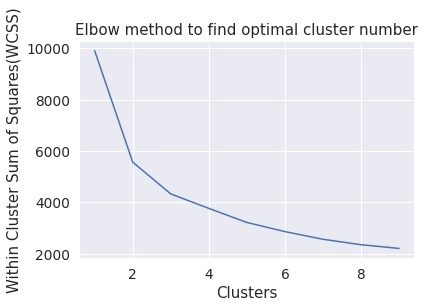

In [33]:
#k-means clustering is unsupervised ML algorithm that uses similar characteristics to form clusters
#we use the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
WCSS = []   #WCSS stands for Within Cluster Sum of Squares
for i in range(1,10):      #the for loop calculates the WCSS for each no.of cluster from 1 to 9 and at each iteration creates a K-Means algorithm for i
  kmeans = KMeans(n_clusters=i, init='random', max_iter = 300, n_init = 10, random_state=0)
  kmeans.fit(pca_data)
  WCSS.append(kmeans.inertia_)
plt.plot(range(1,10), WCSS)
plt.title('Elbow method to find optimal cluster number')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.show()


Number of clusters:  2

Silhouette score =  0.46702919424266826

Number of clusters:  3

Silhouette score =  0.43282165658220745

Number of clusters:  4

Silhouette score =  0.2791866027627668

Number of clusters:  5

Silhouette score =  0.29093304348369414


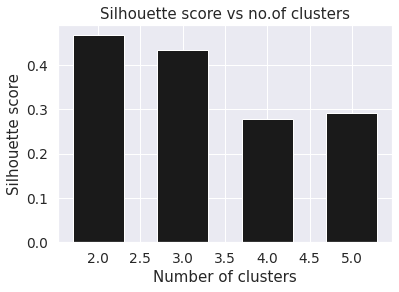

In [34]:
#calculating the performance of the algorithm
from sklearn import metrics

scores=[]
range_values = np.arange(2,6)

for i in range_values:
  kmeans = KMeans(n_clusters=i, init='random', n_init = 10, random_state=0)
  kmeans.fit(pca_data)
  score = metrics.silhouette_score(pca_data, kmeans.labels_, metric = 'euclidean', sample_size = len(pca_data))

  print('\nNumber of clusters: ', i)
  print('\nSilhouette score = ', score)

  scores.append(score)

#plotting the scores
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Silhouette score vs no.of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### **Hierarchical Aggolmerative Clustering**

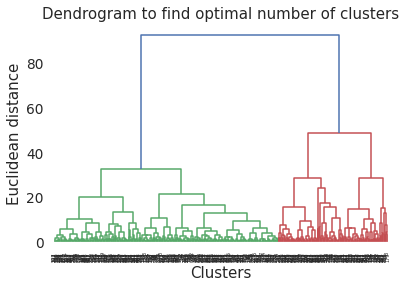

In [35]:
#Using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pca_data, method = 'ward'))


plt.title('Dendrogram to find optimal number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

### **k-means clustering with 2 clusters**

In [36]:
#training the clustering model with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(pca_data)   #not only fits the model to the data but also returns a dependent variable containing an array of numbers where each number corresponds a particular cluster
print(y_kmeans)
from sklearn.metrics import davies_bouldin_score
dv_score = davies_bouldin_score
index = kmeans.labels_
metric = dv_score(pca_data, index)
print('Pre-clustering metrics')
print('----------------------')
print('Davis-Bouldin Score:', metric)
print('Centroids:', kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 0 0 0]
Pre-clustering metrics
----------------------
Davis-Bouldin Score: 0.9778311

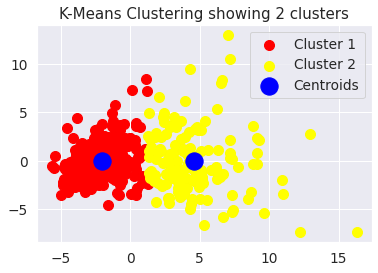

In [37]:
#Creating the clusters
plt.scatter(pca_data[y_kmeans == 0,0], pca_data[y_kmeans == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_kmeans == 1,0], pca_data[y_kmeans == 1,1], s=100, c='yellow', label='Cluster 2')

#Creating the centroids for each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='blue', label = 'Centroids')

plt.legend()

plt.title('K-Means Clustering showing 2 clusters')
plt.show()

### **hierarchical agglomerative clustering with 2 clusters**

In [38]:
#Training the model where number of clusters = 2

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(pca_data)
print(y_hc)

[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0
 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 0 1 1 1]


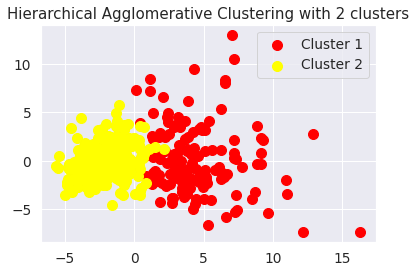

In [39]:
#Visualisation with 2 clusters

plt.scatter(pca_data[y_hc == 0,0], pca_data[y_hc == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_hc == 1,0], pca_data[y_hc == 1,1], s=100, c='yellow', label='Cluster 2')


plt.title('Hierarchical Agglomerative Clustering with 2 clusters')

plt.legend()
plt.show()

### **k-means clustering with 3 clusters**

In [40]:
#training the clustering model with 3 clusters
kmeans_1 = KMeans(n_clusters=3, init='k-means++', random_state=0, max_iter=1, n_init=1)
y_kmeans_1 = kmeans_1.fit_predict(pca_data)   #not only fits the model to the data but also returns a dependent variable containing an array of numbers where each number corresponds a particular cluster
print(y_kmeans_1)
dv_score_1 = davies_bouldin_score
index = kmeans_1.labels_
metric = dv_score_1(pca_data, index)
print('Pre-clustering metrics')
print('----------------------')
print('Davis-Bouldin Score:', metric)
print('Centroids:', kmeans_1.cluster_centers_)

[0 0 0 0 0 0 0 0 1 0 2 1 0 0 0 0 2 0 0 0 1 0 0 0 2 1 0 0 2 0 0 2 0 0 0 0 0
 1 1 0 0 2 0 0 0 2 2 0 0 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 2 0 0 2 2 0 1 2 2 0 0 0 0 0 0 2 2 0 0 1 2 0 0 0 0 0 2 0 2 0 2 0 1 0 0 0 0
 0 0 2 0 2 0 0 0 2 0 0 0 2 0 0 2 2 0 2 0 1 0 2 1 2 2 0 0 0 2 0 2 0 2 0 2 2
 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 0 0 0 2 0 2 1 0 2 1 1 2 0 1 2 0
 0 1 0 0 0 2 0 0 0 1 0 2 2 1 0 0 0 2 2 0 0 0 0 0 0 0 2 0 1 0 0 2 0 0 0 0 2
 2 0 0 0 2 0 2 2 0 0 0 2 0 2 0 1 2 0 0 2 2 0 0 0 2 2 0 0 1 0 0 0 2 0 2 0 2
 2 2 2 1 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 2 0 0 1 0 2 0 0 0 0 0
 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 1 0 0 0 1 2 0 2 0 2 0 0 1 0 0 0 2 2 2 0 0 2
 2 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 2 0 2 2 2 0 2 0 2 0 2
 2 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 2 2 2 0 2 0 0 0
 2 2 2 0 2 2 1 0 2 1 2 0 0 2 0 2 2 0 0 0 1 2 0 0 2 1 0 0 2 0 0 0 0 2 1 0 2
 0 0 1 0 0 2 0 1 0 0 0]
Pre-clustering metrics
----------------------
Davis-Bouldin Score: 1.0514316

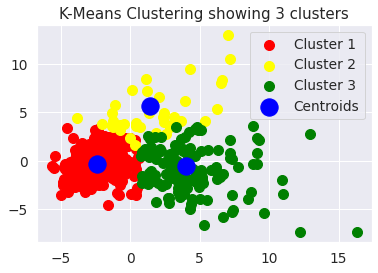

In [41]:
#Creating the clusters
plt.scatter(pca_data[y_kmeans_1 == 0,0], pca_data[y_kmeans_1 == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_kmeans_1 == 1,0], pca_data[y_kmeans_1 == 1,1], s=100, c='yellow', label='Cluster 2')

plt.scatter(pca_data[y_kmeans_1 == 2,0], pca_data[y_kmeans_1 == 2,1], s=100, c='green', label='Cluster 3')

#Creating the centroids for each cluster
plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], s=300, c='blue', label = 'Centroids')

plt.legend()

plt.title('K-Means Clustering showing 3 clusters')
plt.show()

### **heirarchical agglomerative clustering with 3 clusters**

In [42]:
#Training the model where number of clusters = 3
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc_1=hc.fit_predict(pca_data)
print(y_hc_1)

[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 2 0 0 2 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 2 0 0 2 1 0 0 2 2 0 0 0 0 0 0 2 2 0 0 1 2 0 0 0 0 0 2 0 2 0 2 0 1 0 0 0 0
 0 0 1 0 2 0 0 0 2 0 0 0 1 0 0 2 2 0 2 0 1 0 1 1 2 0 0 0 0 2 0 1 0 2 0 1 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 2 0 2 0 0 1 0 1 2 0 1 2 0
 0 1 0 0 0 2 0 0 0 1 0 2 2 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 2
 2 0 0 0 1 0 2 2 0 0 0 0 0 2 0 1 2 0 0 2 2 0 0 0 2 1 0 0 1 0 0 0 1 0 2 0 2
 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 2 2 2 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 1 2 0 2 0 1 0 0 1 0 0 0 2 2 1 0 0 2
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 0 0 2 0 1 1 1 0 2 0 2 0 2
 2 0 0 0 0 0 0 0 0 2 2 1 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 1 0 1 0 0 0
 2 1 0 0 1 2 1 0 2 0 2 0 0 2 0 0 1 0 0 0 1 2 0 0 2 1 0 0 1 0 0 0 0 1 0 0 2
 0 0 0 0 0 2 0 1 0 0 0]


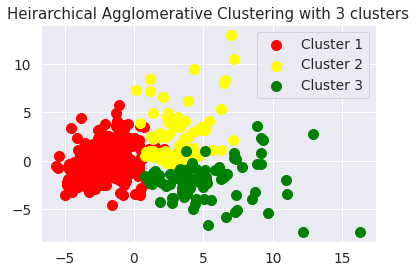

In [43]:
#Visualisation with 3 clusters

plt.scatter(pca_data[y_hc_1 == 0,0], pca_data[y_hc_1 == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_hc_1 == 1,0], pca_data[y_hc_1 == 1,1], s=100, c='yellow', label='Cluster 2')

plt.scatter(pca_data[y_hc_1 == 2,0], pca_data[y_hc_1 == 2,1], s=100, c='green', label='Cluster 3')

plt.title('Heirarchical Agglomerative Clustering with 3 clusters')

plt.legend()
plt.show()

### **k-means clustering with 4 clusters**

In [44]:
#training the clustering model with 4 clusters

kmeans_2 = KMeans(n_clusters=4, init='k-means++', random_state=0, max_iter=1, n_init=1)
y_kmeans_2 = kmeans_2.fit_predict(pca_data)   #not only fits the model to the data but also returns a dependent variable containing an array of numbers where each number corresponds a particular cluster
print(y_kmeans_2)
dv_score_2 = davies_bouldin_score
index = kmeans_2.labels_
metric = dv_score_2(pca_data, index)
print('Pre-clustering metrics')
print('----------------------')
print('Davis-Bouldin Score:', metric)
print('Centroids:', kmeans_2.cluster_centers_)

[3 3 0 3 0 0 3 0 1 3 2 1 0 0 3 3 2 3 0 3 1 0 0 0 2 3 0 3 2 0 3 2 0 0 0 0 3
 1 1 0 3 2 0 0 0 2 2 0 3 2 0 2 2 2 3 0 3 3 3 0 0 3 3 0 3 0 2 0 0 0 3 3 0 3
 2 0 3 2 2 3 3 2 2 0 0 0 0 0 0 2 2 0 0 1 2 0 3 0 3 0 2 3 2 0 2 0 1 3 0 0 0
 0 3 2 3 2 0 0 0 2 3 0 0 2 3 0 2 2 3 2 3 1 0 2 1 2 2 3 0 0 2 0 2 0 2 0 2 2
 0 0 3 3 3 0 3 0 0 3 3 0 0 2 3 0 3 1 3 3 0 3 0 0 2 0 2 3 3 0 1 1 2 3 1 2 0
 0 1 3 0 3 2 3 0 0 1 0 2 2 1 3 3 3 0 2 0 3 0 3 0 0 0 2 3 1 0 3 2 0 0 3 3 2
 2 3 0 0 2 3 2 2 0 3 0 2 3 2 0 1 2 0 0 2 2 3 0 3 2 2 3 0 1 3 3 3 2 0 2 3 2
 2 2 2 3 0 0 3 0 0 0 0 3 0 0 3 0 0 2 0 0 2 2 2 2 0 3 2 3 0 1 0 0 3 0 3 3 3
 2 2 2 3 2 2 0 3 0 3 0 0 2 3 0 3 0 0 0 1 2 0 2 3 2 0 0 1 3 3 0 2 0 2 3 3 2
 2 0 0 3 3 2 1 0 3 0 0 0 0 0 3 0 2 2 0 3 3 2 3 0 3 0 2 0 2 2 2 3 2 3 2 3 2
 2 0 0 0 3 3 0 3 0 2 2 2 2 2 3 3 0 0 3 0 3 2 3 0 0 3 0 0 0 2 2 2 0 2 0 0 3
 2 2 0 0 2 2 1 0 2 1 2 3 3 2 3 2 2 3 0 3 1 2 0 0 2 1 0 3 2 3 0 3 0 2 1 3 2
 3 0 3 0 0 2 0 1 3 3 3]
Pre-clustering metrics
----------------------
Davis-Bouldin Score: 1.2703820

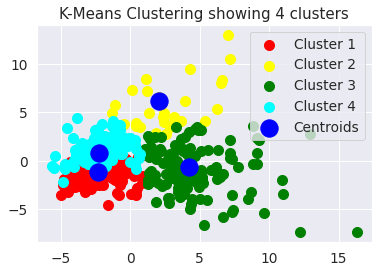

In [45]:
#Creating the 4 clusters

plt.scatter(pca_data[y_kmeans_2 == 0,0], pca_data[y_kmeans_2 == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_kmeans_2 == 1,0], pca_data[y_kmeans_2 == 1,1], s=100, c='yellow', label='Cluster 2')

plt.scatter(pca_data[y_kmeans_2 == 2,0], pca_data[y_kmeans_2 == 2,1], s=100, c='green', label='Cluster 3')

plt.scatter(pca_data[y_kmeans_2 == 3,0], pca_data[y_kmeans_2 == 3,1], s=100, c='cyan', label='Cluster 4')


#Creating the centroids for each cluster
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s=300, c='blue', label = 'Centroids')

plt.legend()

plt.title('K-Means Clustering showing 4 clusters')
plt.show()

### **hierarchical agglomerative clustering with 4 clusters**

In [46]:
#Training the model where number of clusters = 4

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc_2=hc.fit_predict(pca_data)
print(y_hc_2)

[1 3 1 1 1 1 1 1 0 3 2 3 1 1 1 1 2 1 1 3 0 1 1 1 2 3 1 3 2 1 1 2 1 1 1 1 3
 0 0 3 1 0 1 3 1 0 2 1 3 2 1 0 0 0 3 1 1 3 1 3 1 1 1 3 1 1 2 3 1 1 1 1 1 3
 2 1 3 2 0 3 3 2 2 1 1 3 3 1 1 2 2 1 1 0 2 1 3 1 1 1 2 3 2 3 2 3 0 1 1 1 1
 1 3 0 1 2 1 3 1 2 1 1 1 0 1 1 2 2 3 2 3 0 1 0 0 2 3 3 3 1 2 3 0 1 2 1 0 2
 1 1 1 3 1 1 3 1 1 3 3 1 1 2 3 1 3 0 3 3 1 3 1 1 2 1 2 3 3 0 3 0 2 1 0 2 3
 1 0 1 1 3 2 3 1 1 0 1 2 2 3 3 3 1 2 2 3 3 1 3 3 1 1 2 3 0 3 3 0 3 1 3 3 2
 2 1 3 1 0 1 2 2 1 3 1 3 1 2 1 0 2 1 1 2 2 1 1 1 2 0 3 1 0 1 3 1 0 1 2 3 2
 0 2 2 3 1 1 3 1 1 1 3 3 1 1 3 1 1 2 1 3 2 2 2 0 1 3 0 3 1 0 1 0 3 1 1 3 3
 2 2 2 3 2 2 1 1 1 3 1 3 0 1 1 3 1 1 1 0 2 1 2 3 0 3 1 0 1 3 1 2 2 0 3 1 2
 0 1 1 3 3 0 0 1 3 1 1 1 1 1 3 1 2 2 3 1 1 0 1 1 3 1 2 1 0 0 0 3 2 3 2 1 2
 2 1 1 1 3 1 1 3 1 2 2 0 2 2 3 3 1 1 1 1 3 2 1 1 1 3 3 3 1 2 2 0 1 0 1 1 3
 2 0 1 3 0 2 0 1 2 3 2 1 3 2 3 3 0 1 1 3 0 2 1 3 2 0 3 3 0 3 1 3 3 0 3 1 2
 3 1 3 3 1 2 1 0 1 1 3]


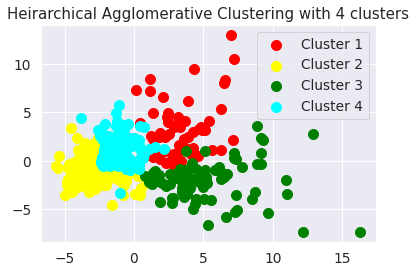

In [47]:
#Visualization with 5 clusters
plt.scatter(pca_data[y_hc_2 == 0,0], pca_data[y_hc_2 == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_hc_2 == 1,0], pca_data[y_hc_2 == 1,1], s=100, c='yellow', label='Cluster 2')

plt.scatter(pca_data[y_hc_2 == 2,0], pca_data[y_hc_2 == 2,1], s=100, c='green', label='Cluster 3')

plt.scatter(pca_data[y_hc_2 == 3,0], pca_data[y_hc_2 == 3,1], s=100, c='cyan', label='Cluster 4')


plt.title('Heirarchical Agglomerative Clustering with 4 clusters')

plt.legend()
plt.show()

### **k-means clustering with 5 clusters**

In [48]:
#training the clustering model with 5 clusters
kmeans_3 = KMeans(n_clusters=5, init='k-means++', random_state=0, max_iter=1, n_init=1)
y_kmeans_3 = kmeans_3.fit_predict(pca_data)   #not only fits the model to the data but also returns a dependent variable containing an array of numbers where each number corresponds a particular cluster
print(y_kmeans_3)
dv_score_3 = davies_bouldin_score
index = kmeans_3.labels_
metric = dv_score_3(pca_data, index)
print('Pre-clustering metrics')
print('----------------------')
print('Davis-Bouldin Score:', metric)
print('Centroids:', kmeans_3.cluster_centers_)

[3 3 0 3 0 0 3 0 1 4 2 1 4 0 3 3 2 3 0 4 1 0 0 0 2 3 0 3 2 0 3 2 0 0 0 0 3
 1 1 4 3 4 0 4 0 2 2 0 4 2 0 2 4 2 4 0 3 4 3 0 4 3 3 4 3 4 2 4 0 4 4 3 4 4
 2 0 3 2 4 4 3 2 2 0 0 3 0 0 0 2 2 0 0 1 2 0 4 0 3 0 2 3 2 4 2 4 4 3 0 0 0
 0 3 4 3 2 0 4 0 2 3 0 0 4 3 0 4 2 3 2 3 1 0 2 1 4 4 4 0 0 2 4 1 0 2 4 4 2
 0 0 3 3 3 3 3 0 0 3 3 0 0 2 4 0 3 1 3 3 0 3 0 0 2 0 2 4 3 4 1 1 4 3 1 2 4
 0 1 3 0 4 2 4 0 0 1 0 2 2 1 4 4 3 4 2 0 3 0 3 4 0 4 2 4 1 4 3 4 4 0 3 3 2
 2 3 4 0 2 3 4 2 0 4 0 4 3 2 0 1 2 0 4 2 2 3 4 3 2 4 4 0 1 3 4 3 2 0 2 4 2
 4 2 2 3 0 3 4 0 0 0 4 3 0 0 4 0 0 2 0 4 2 2 2 4 0 3 2 3 0 1 4 4 4 4 3 3 3
 2 2 2 3 2 2 0 3 0 4 0 4 4 0 0 3 0 0 0 1 2 0 2 4 2 4 0 1 3 3 0 2 4 2 3 3 2
 2 0 4 4 3 4 4 0 4 0 0 0 0 0 3 0 2 2 4 3 3 2 3 0 4 0 2 0 2 4 2 3 2 4 4 3 2
 2 4 0 0 3 3 0 4 0 2 2 2 2 2 4 3 0 0 3 4 4 2 3 0 0 3 4 4 4 2 4 4 0 2 4 0 4
 2 2 4 4 4 2 1 0 2 1 2 3 4 2 4 4 2 3 0 3 1 2 0 4 2 1 4 3 2 4 0 4 4 2 4 3 2
 3 0 3 4 0 2 0 1 3 3 3]
Pre-clustering metrics
----------------------
Davis-Bouldin Score: 1.1166559

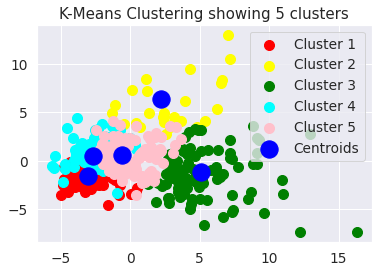

In [49]:
#Creating the clusters
plt.scatter(pca_data[y_kmeans_3 == 0,0], pca_data[y_kmeans_3 == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_kmeans_3 == 1,0], pca_data[y_kmeans_3 == 1,1], s=100, c='yellow', label='Cluster 2')

plt.scatter(pca_data[y_kmeans_3 == 2,0], pca_data[y_kmeans_3 == 2,1], s=100, c='green', label='Cluster 3')

plt.scatter(pca_data[y_kmeans_3 == 3,0], pca_data[y_kmeans_3 == 3,1], s=100, c='cyan', label='Cluster 4')

plt.scatter(pca_data[y_kmeans_3 == 4,0], pca_data[y_kmeans_3 == 4,1], s=100, c='pink', label='Cluster 5')

#Creating the centroids for each cluster
plt.scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], s=300, c='blue', label = 'Centroids')

plt.legend()

plt.title('K-Means Clustering showing 5 clusters')
plt.show()

### **heirarchical agglomerative clustering with 5 clusters**

In [50]:
#Training the model where number of clusters = 5
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc_3=hc.fit_predict(pca_data)
print(y_hc_3)

[1 3 1 1 1 1 1 1 2 3 0 3 1 1 1 1 0 1 1 3 4 1 1 1 0 3 1 3 0 1 1 0 1 1 1 1 3
 4 2 3 1 4 1 3 1 4 0 1 3 0 1 4 4 4 3 1 1 3 1 3 1 1 1 3 1 1 0 3 1 1 1 1 1 3
 0 1 3 0 4 3 3 0 0 1 1 3 3 1 1 0 0 1 1 2 0 1 3 1 1 1 0 3 0 3 0 3 4 1 1 1 1
 1 3 4 1 0 1 3 1 0 1 1 1 4 1 1 0 0 3 0 3 4 1 4 4 0 3 3 3 1 0 3 4 1 0 1 4 0
 1 1 1 3 1 1 3 1 1 3 3 1 1 0 3 1 3 4 3 3 1 3 1 1 0 1 0 3 3 4 3 2 0 1 4 0 3
 1 4 1 1 3 0 3 1 1 2 1 0 0 3 3 3 1 0 0 3 3 1 3 3 1 1 0 3 2 3 3 4 3 1 3 3 0
 0 1 3 1 4 1 0 0 1 3 1 3 1 0 1 2 0 1 1 0 0 1 1 1 0 4 3 1 4 1 3 1 4 1 0 3 0
 4 0 0 3 1 1 3 1 1 1 3 3 1 1 3 1 1 0 1 3 0 0 0 4 1 3 4 3 1 2 1 4 3 1 1 3 3
 0 0 0 3 0 0 1 1 1 3 1 3 4 1 1 3 1 1 1 2 0 1 0 3 4 3 1 4 1 3 1 0 0 4 3 1 0
 4 1 1 3 3 4 4 1 3 1 1 1 1 1 3 1 0 0 3 1 1 4 1 1 3 1 0 1 4 4 4 3 0 3 0 1 0
 0 1 1 1 3 1 1 3 1 0 0 4 0 0 3 3 1 1 1 1 3 0 1 1 1 3 3 3 1 0 0 4 1 4 1 1 3
 0 4 1 3 4 0 4 1 0 3 0 1 3 0 3 3 4 1 1 3 2 0 1 3 0 2 3 3 4 3 1 3 3 4 3 1 0
 3 1 3 3 1 0 1 2 1 1 3]


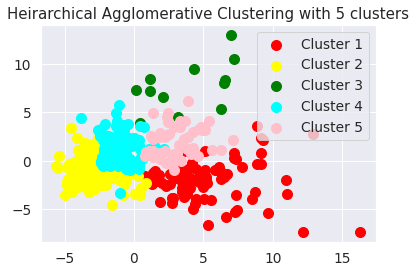

In [51]:
#Visualization with 5 clusters
plt.scatter(pca_data[y_hc_3 == 0,0], pca_data[y_hc_3 == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_hc_3 == 1,0], pca_data[y_hc_3 == 1,1], s=100, c='yellow', label='Cluster 2')

plt.scatter(pca_data[y_hc_3 == 2,0], pca_data[y_hc_3 == 2,1], s=100, c='green', label='Cluster 3')

plt.scatter(pca_data[y_hc_3 == 3,0], pca_data[y_hc_3 == 3,1], s=100, c='cyan', label='Cluster 4')

plt.scatter(pca_data[y_hc_3 == 4,0], pca_data[y_hc_3 == 4,1], s=100, c='pink', label='Cluster 5')

plt.title('Heirarchical Agglomerative Clustering with 5 clusters')

plt.legend()
plt.show()

### **Clustering and Classification**

In [52]:
#Calculating the purity metric 

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [53]:
purity_score(y_train, y_kmeans)

0.9054945054945055

In [54]:
purity_score(y_train, y_kmeans_1)

0.9076923076923077

In [55]:
purity_score(y_train, y_kmeans_2)

0.8967032967032967

In [56]:
purity_score(y_train, y_hc)

0.9120879120879121

In [57]:
purity_score(y_train, y_hc_1)

0.9120879120879121

In [58]:
purity_score(y_train, y_hc_2)

0.9120879120879121

In [133]:
#Encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
print('The target variable in training set after label encoding:\n', y_train)

y_test = le.fit_transform(y_test)
print('\n-------------------------\n')
print('The target variable in testing set after label encoding:\n', y_test)

The target variable in training set after label encoding:
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 0 0]

----------------

#**Classification of the data with different numbers of principal components**

### **K-NN Classification using 2 principal components for visualization**

In [134]:
#Performing PCA with 2 components

new_pca = PCA(n_components=2)
traindata_2comp = new_pca.fit_transform(x_train_std)

In [135]:
#Training the K-NN model on the reduced training set

from sklearn.neighbors import KNeighborsClassifier

new_KNNclassifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
new_KNNclassifier.fit(traindata_2comp, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


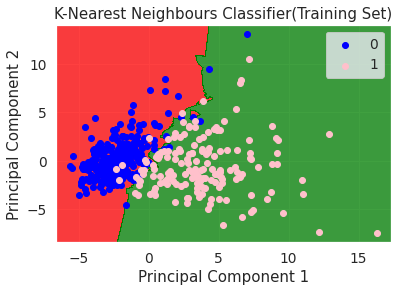

In [136]:
#Visualising training set results

from matplotlib.colors import ListedColormap
x_set, y_set = traindata_2comp, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,new_KNNclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('blue','pink'))(i), label=j)
plt.title('K-Nearest Neighbours Classifier(Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [137]:
#Predicting the test set result

testdata_2comp = new_pca.fit_transform(x_test_std)   #applying PCA with 2 components on x variable in testing set

new_y_pred_knn=new_KNNclassifier.predict(testdata_2comp)
print(np.concatenate((new_y_pred_knn.reshape(len(new_y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


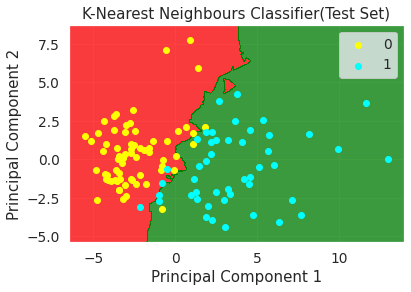

In [138]:
#Visualising test set results

from matplotlib.colors import ListedColormap
x_set, y_set = testdata_2comp, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,new_KNNclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('K-Nearest Neighbours Classifier(Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [139]:
#Evaluating model performance

from sklearn.metrics import confusion_matrix, accuracy_score

new_cm_knn=(confusion_matrix(y_test,new_y_pred_knn))
print('---The confusion matrix is given by:\n',new_cm_knn)

new_cm_knn = new_cm_knn.astype('float')/new_cm_knn.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', new_cm_knn.diagonal())

acsa = (new_cm_knn[0,0]/sum(new_cm_knn[0,:])+new_cm_knn[1,1]/sum(new_cm_knn[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [new_cm_knn[i,i]/np.sum(new_cm_knn[:,i]) if np.sum(new_cm_knn[:,i]) else 0 for i in range(len(new_cm_knn))]
print('\n---Predictive Positive Value Score is: ', ppvs)

new_ac_knn=(accuracy_score(y_test,new_y_pred_knn))*100
print('\n---The overall accuracy is given by: ',new_ac_knn,"%")

---The confusion matrix is given by:
 [[64  3]
 [ 3 44]]

---Accuracy score for each separate class:  [0.95522388 0.93617021]

---Average Class Specific Accuracy is:  0.9456970466814862

---Predictive Positive Value Score is:  [0.9373636646930507, 0.954354159922305]

---The overall accuracy is given by:  94.73684210526315 %


### **Logistic Regression using 2 principal components for visualization**

In [140]:
#Training the model with 2 principal components

from sklearn.linear_model import LogisticRegression

new_LRclassifier=LogisticRegression(random_state=0)
new_LRclassifier.fit(traindata_2comp,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


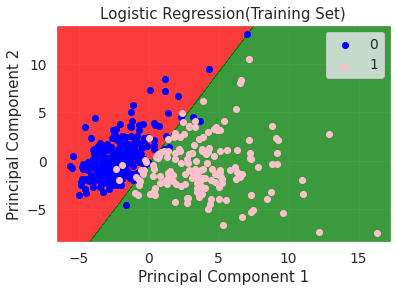

In [141]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = traindata_2comp, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,new_LRclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('blue','pink'))(i), label=j)
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [142]:
#Predicting the test set result

new_y_pred_lr=new_LRclassifier.predict(testdata_2comp)

print(np.concatenate((new_y_pred_lr.reshape(len(new_y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


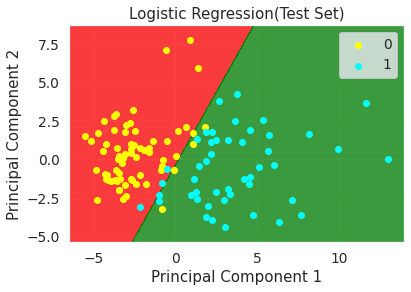

In [143]:
#Visualising test set results

from matplotlib.colors import ListedColormap
x_set, y_set = testdata_2comp, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,new_LRclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('Logistic Regression(Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [144]:
#Evaluating model performance

new_cm_lr=(confusion_matrix(y_test,new_y_pred_lr))
print('---The confusion matrix is given by:\n',new_cm_lr)

new_cm_lr = new_cm_lr.astype('float')/new_cm_lr.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', new_cm_lr.diagonal())

acsa = (new_cm_lr[0,0]/sum(new_cm_lr[0,:])+new_cm_lr[1,1]/sum(new_cm_lr[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [new_cm_lr[i,i]/np.sum(new_cm_lr[:,i]) if np.sum(new_cm_lr[:,i]) else 0 for i in range(len(new_cm_lr))]
print('\n---Predictive Positive Value Score is: ', ppvs)

new_ac_lr=(accuracy_score(y_test,new_y_pred_lr))*100
print('\n---The overall accuracy is given by: ',new_ac_lr,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 3 44]]

---Accuracy score for each separate class:  [0.94029851 0.93617021]

---Average Class Specific Accuracy is:  0.938234360114322

---Predictive Positive Value Score is:  [0.9364326375711575, 0.9400510204081634]

---The overall accuracy is given by:  93.85964912280701 %


### **Linear SVM using 2 principal components**

In [145]:
#Model training

from sklearn.svm import SVC

new_SVMclassifier=SVC(kernel='linear', random_state=0)
new_SVMclassifier.fit(traindata_2comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


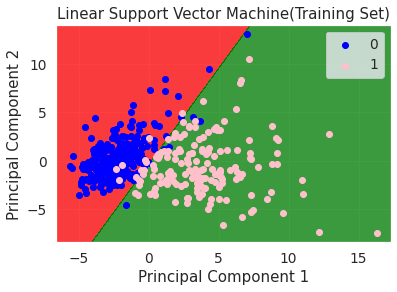

In [146]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = traindata_2comp, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,new_SVMclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('blue','pink'))(i), label=j)
plt.title('Linear Support Vector Machine(Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [147]:
#Predicting results

new_y_pred_svm=new_SVMclassifier.predict(testdata_2comp)

print(np.concatenate((new_y_pred_svm.reshape(len(new_y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


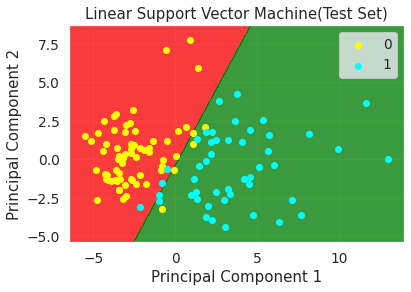

In [148]:
#Visualising test set results

from matplotlib.colors import ListedColormap
x_set, y_set = testdata_2comp, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,new_SVMclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('Linear Support Vector Machine(Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [149]:
#Evaluating model performance

new_cm_svm=(confusion_matrix(y_test,new_y_pred_svm))
print('---The confusion matrix is given by:\n',new_cm_svm)

new_cm_svm = new_cm_svm.astype('float')/new_cm_svm.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', new_cm_svm.diagonal())

acsa = (new_cm_svm[0,0]/sum(new_cm_svm[0,:])+new_cm_svm[1,1]/sum(new_cm_svm[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [new_cm_svm[i,i]/np.sum(new_cm_svm[:,i]) if np.sum(new_cm_svm[:,i]) else 0 for i in range(len(new_cm_svm))]
print('\n---Predictive Positive Value Score is: ', ppvs)

new_ac_svm=(accuracy_score(y_test,new_y_pred_svm))*100
print('\n---The overall accuracy is given by: ',new_ac_svm,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 4 43]]

---Accuracy score for each separate class:  [0.94029851 0.91489362]

---Average Class Specific Accuracy is:  0.9275960622419817

---Predictive Positive Value Score is:  [0.9170021678538248, 0.9387422613229065]

---The overall accuracy is given by:  92.98245614035088 %


### **Kernel SVM using 2 principal components**

In [207]:
#Model training with 2 components

new_rbfSVMclassifier=SVC(kernel='rbf', random_state=0)
new_rbfSVMclassifier.fit(traindata_2comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


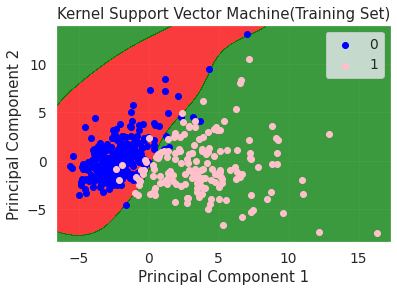

In [208]:
#Visualising training set results
from matplotlib.colors import ListedColormap
x_set, y_set = traindata_2comp, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,new_rbfSVMclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('blue','pink'))(i), label=j)
plt.title('Kernel Support Vector Machine(Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [209]:
#Predicting results

new_y_pred_rbfsvm=new_rbfSVMclassifier.predict(testdata_2comp)

print(np.concatenate((new_y_pred_rbfsvm.reshape(len(new_y_pred_rbfsvm),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


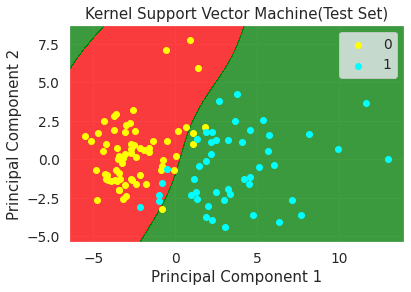

In [210]:
#Visualising test set results

from matplotlib.colors import ListedColormap
x_set, y_set = testdata_2comp, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,new_rbfSVMclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],c=ListedColormap(('yellow','cyan'))(i), label=j)
plt.title('Kernel Support Vector Machine(Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [211]:
#Evaluating model performance

new_cm_rbfsvm=(confusion_matrix(y_test,new_y_pred_rbfsvm))
print('---The confusion matrix is given by:\n',new_cm_rbfsvm)

new_cm_rbfsvm = new_cm_rbfsvm.astype('float')/new_cm_rbfsvm.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', new_cm_rbfsvm.diagonal())

acsa = (new_cm_rbfsvm[0,0]/sum(new_cm_rbfsvm[0,:])+new_cm_rbfsvm[1,1]/sum(new_cm_rbfsvm[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [new_cm_rbfsvm[i,i]/np.sum(new_cm_rbfsvm[:,i]) if np.sum(new_cm_rbfsvm[:,i]) else 0 for i in range(len(new_cm_rbfsvm))]
print('\n---Predictive Positive Value Score is: ', ppvs)

new_ac_rbfsvm=(accuracy_score(y_test,new_y_pred_rbfsvm))*100
print('\n---The overall accuracy is given by: ',new_ac_rbfsvm,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 5 42]]

---Accuracy score for each separate class:  [0.94029851 0.89361702]

---Average Class Specific Accuracy is:  0.9169577643696412

---Predictive Positive Value Score is:  [0.8983616504854368, 0.9373750832778148]

---The overall accuracy is given by:  92.10526315789474 %


### **K-NN classification using 3 principal components**

In [212]:
#Reducing the data to 3 components

pca_3comp = PCA(n_components=3)
traindata_3comp = pca_3comp.fit_transform(x_train_std)  #training data having 3 components

In [213]:
#Training the KNN model 

from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNNclassifier.fit(traindata_3comp, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [214]:
#Predicting the test set result

testdata_3comp = pca_3comp.fit_transform(x_test_std)  #applying PCA on test data

y_pred_knn=KNNclassifier.predict(testdata_3comp)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [215]:
#Evaluating model performance
from sklearn.metrics import confusion_matrix, accuracy_score

cm_knn=(confusion_matrix(y_test,y_pred_knn))
print('---The confusion matrix is given by:\n',cm_knn)

cm_knn = cm_knn.astype('float')/cm_knn.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ',cm_knn.diagonal())

acsa = (cm_knn[0,0]/sum(cm_knn[0,:])+cm_knn[1,1]/sum(cm_knn[1,:]))/2
print('\n---Average Class Specific Accuracy is: ',acsa)

ppvs = [cm_knn[i,i]/np.sum(cm_knn[:,i]) if np.sum(cm_knn[:,i]) else 0 for i in range(len(cm_knn))]
print('\n---Predictive Positive Value Score is: ',ppvs)

ac_knn=(accuracy_score(y_test,y_pred_knn))*100
print('\n---The overall accuracy is given by:',ac_knn,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 3 44]]

---Accuracy score for each separate class:  [0.94029851 0.93617021]

---Average Class Specific Accuracy is:  0.938234360114322

---Predictive Positive Value Score is:  [0.9364326375711575, 0.9400510204081634]

---The overall accuracy is given by: 93.85964912280701 %


### **Logistic Regression with 3 principal components**

In [216]:
#Training the model with 3 principal components

LRclassifier=LogisticRegression(random_state=0)
LRclassifier.fit(traindata_3comp, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
#Predicting the test set result

y_pred_lr=LRclassifier.predict(testdata_3comp)

print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [218]:
#Evaluating model performance

cm_lr=(confusion_matrix(y_test,y_pred_lr))
print('---The confusion matrix is given by:\n',cm_lr)

cm_lr = cm_lr.astype('float')/cm_lr.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_lr.diagonal())

acsa = (cm_lr[0,0]/sum(cm_lr[0,:])+cm_lr[1,1]/sum(cm_lr[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_lr[i,i]/np.sum(cm_lr[:,i]) if np.sum(cm_lr[:,i]) else 0 for i in range(len(cm_lr))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_lr=(accuracy_score(y_test,y_pred_lr))*100
print('\n---The overall accuracy is given by: ',ac_lr,"%")

---The confusion matrix is given by:
 [[62  5]
 [ 3 44]]

---Accuracy score for each separate class:  [0.92537313 0.93617021]

---Average Class Specific Accuracy is:  0.9307716735471578

---Predictive Positive Value Score is:  [0.9354735152487962, 0.9261702796104304]

---The overall accuracy is given by:  92.98245614035088 %


### **SVM using 3 principal components**

In [219]:
#Model training with 3 components

SVMclassifier=SVC(kernel='linear', random_state=0)
SVMclassifier.fit(traindata_3comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [220]:
#Predicting the test set result

y_pred_svm=SVMclassifier.predict(testdata_3comp)

print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [221]:
#Evaluating model performance

cm_svm=(confusion_matrix(y_test,y_pred_svm))
print('---The confusion matrix is given by:\n',cm_svm)

cm_svm = cm_svm.astype('float')/cm_svm.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_svm.diagonal())

acsa = (cm_svm[0,0]/sum(cm_svm[0,:])+cm_svm[1,1]/sum(cm_svm[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_svm[i,i]/np.sum(cm_svm[:,i]) if np.sum(cm_svm[:,i]) else 0 for i in range(len(cm_svm))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_svm=(accuracy_score(y_test,y_pred_svm))*100
print('\n---The overall accuracy is given by: ',ac_svm,"%")

---The confusion matrix is given by:
 [[64  3]
 [ 4 43]]

---Accuracy score for each separate class:  [0.95522388 0.91489362]

---Average Class Specific Accuracy is:  0.9350587488091457

---Predictive Positive Value Score is:  [0.9181929181929182, 0.9533421575115817]

---The overall accuracy is given by:  93.85964912280701 %


### **Kernel SVM using 3 principal components**

In [222]:
#Model training with 3 components

rbf_SVMclassifier=SVC(kernel='rbf', random_state=0)
rbf_SVMclassifier.fit(traindata_3comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [223]:
#Predicting the test set result

y_pred_rbfsvm=rbf_SVMclassifier.predict(testdata_3comp)

print(np.concatenate((y_pred_rbfsvm.reshape(len(y_pred_rbfsvm),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [224]:
#Evaluating model performance

cm_rbfsvm=(confusion_matrix(y_test,y_pred_rbfsvm))
print('---The confusion matrix is given by:\n',cm_rbfsvm)

cm_rbfsvm = cm_rbfsvm.astype('float')/cm_rbfsvm.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_rbfsvm.diagonal())

acsa = (cm_rbfsvm[0,0]/sum(cm_rbfsvm[0,:])+cm_rbfsvm[1,1]/sum(cm_rbfsvm[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_rbfsvm[i,i]/np.sum(cm_rbfsvm[:,i]) if np.sum(cm_rbfsvm[:,i]) else 0 for i in range(len(cm_rbfsvm))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_rbfsvm=(accuracy_score(y_test,y_pred_rbfsvm))*100
print('\n---The overall accuracy is given by: ',ac_rbfsvm,"%")

---The confusion matrix is given by:
 [[62  5]
 [ 5 42]]

---Accuracy score for each separate class:  [0.92537313 0.89361702]

---Average Class Specific Accuracy is:  0.909495077802477

---Predictive Positive Value Score is:  [0.89689135118498, 0.922925549360446]

---The overall accuracy is given by:  91.22807017543859 %


### **K-NN classification using 4 principal components**

In [225]:
#Performing PCA with 4 components

pca_4comp = PCA(n_components=4)
traindata_4comp = pca_4comp.fit_transform(x_train_std)

In [226]:
#Training the K-NN model on the reduced training set

KNNclassifier_1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNNclassifier_1.fit(traindata_4comp, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [227]:
#Predicting the test set result

testdata_4comp = pca_4comp.fit_transform(x_test_std)

y_pred_knn_1=KNNclassifier_1.predict(testdata_4comp)
print(np.concatenate((y_pred_knn_1.reshape(len(y_pred_knn_1),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [228]:
#Evaluating model performance

cm_knn_1=(confusion_matrix(y_test,y_pred_knn_1))
print('---The confusion matrix is given by:\n', cm_knn_1)

cm_knn_1 = cm_knn_1.astype('float')/cm_knn_1.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ',cm_knn_1.diagonal())

acsa = (cm_knn_1[0,0]/sum(cm_knn_1[0,:])+cm_knn_1[1,1]/sum(cm_knn_1[1,:]))/2
print('\n---Average Class Specific Accuracy is: ',acsa)

ppvs = [cm_knn_1[i,i]/np.sum(cm_knn_1[:,i]) if np.sum(cm_knn_1[:,i]) else 0 for i in range(len(cm_knn_1))]
print('\n---Predictive Positive Value Score is: ',ppvs)

ac_knn_1=(accuracy_score(y_test,y_pred_knn_1))*100
print('\n---The overall accuracy is given by:',ac_knn_1,"%")

---The confusion matrix is given by:
 [[66  1]
 [ 5 42]]

---Accuracy score for each separate class:  [0.98507463 0.89361702]

---Average Class Specific Accuracy is:  0.9393458240711337

---Predictive Positive Value Score is:  [0.9025312772766948, 0.9835721775602936]

---The overall accuracy is given by: 94.73684210526315 %


### **Logistic Regression with 4 principal components**

In [229]:
#Training the model with 4 principal components

LRclassifier_1=LogisticRegression(random_state=0)
LRclassifier_1.fit(traindata_4comp,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
#Predicting the test set result

y_pred_lr_1=LRclassifier_1.predict(testdata_4comp)
print(np.concatenate((y_pred_lr_1.reshape(len(y_pred_lr_1),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [231]:
#Evaluating model performance

cm_lr_1=(confusion_matrix(y_test,y_pred_lr_1))
print('---The confusion matrix is given by:\n',cm_lr_1)

cm_lr_1 = cm_lr_1.astype('float')/cm_lr_1.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_lr_1.diagonal())

acsa = (cm_lr_1[0,0]/sum(cm_lr_1[0,:])+cm_lr_1[1,1]/sum(cm_lr_1[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_lr_1[i,i]/np.sum(cm_lr_1[:,i]) if np.sum(cm_lr_1[:,i]) else 0 for i in range(len(cm_lr_1))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_lr_1=(accuracy_score(y_test,y_pred_lr_1))*100
print('\n---The overall accuracy is given by: ',ac_lr_1,"%")

---The confusion matrix is given by:
 [[65  2]
 [ 4 43]]

---Accuracy score for each separate class:  [0.97014925 0.91489362]

---Average Class Specific Accuracy is:  0.94252143537631

---Predictive Positive Value Score is:  [0.9193499849533554, 0.9684033613445379]

---The overall accuracy is given by:  94.73684210526315 %


### **SVM using 4 principal components**

In [232]:
#Model training with 4 components

SVMclassifier_1=SVC(kernel='linear', random_state=0)
SVMclassifier_1.fit(traindata_4comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [233]:
#Predicting the test set result

y_pred_svm_1=SVMclassifier_1.predict(testdata_4comp)

print(np.concatenate((y_pred_svm_1.reshape(len(y_pred_svm_1),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [234]:
#Evaluating model performance

cm_svm_1=(confusion_matrix(y_test,y_pred_svm_1))
print('---The confusion matrix is given by:\n',cm_svm_1)

cm_svm_1 = cm_svm_1.astype('float')/cm_svm_1.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_svm_1.diagonal())

acsa = (cm_svm_1[0,0]/sum(cm_svm_1[0,:])+cm_svm_1[1,1]/sum(cm_svm_1[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_svm_1[i,i]/np.sum(cm_svm_1[:,i]) if np.sum(cm_svm_1[:,i]) else 0 for i in range(len(cm_svm_1))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_svm_1=(accuracy_score(y_test,y_pred_svm_1))*100
print('\n---The overall accuracy is given by: ',ac_svm_1,"%")

---The confusion matrix is given by:
 [[65  2]
 [ 3 44]]

---Accuracy score for each separate class:  [0.97014925 0.93617021]

---Average Class Specific Accuracy is:  0.9531597332486503

---Predictive Positive Value Score is:  [0.9382678132678132, 0.9690992767915845]

---The overall accuracy is given by:  95.6140350877193 %


### **Kernel SVM using 4 components**

In [235]:
#Model training with 4 components

rbf_SVMclassifier_1=SVC(kernel='rbf', random_state=0)
rbf_SVMclassifier_1.fit(traindata_4comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [236]:
#Predicting the test set result

y_pred_rbfsvm_1=rbf_SVMclassifier_1.predict(testdata_4comp)

print(np.concatenate((y_pred_rbfsvm_1.reshape(len(y_pred_rbfsvm_1),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [237]:
#Evaluating model performance

cm_rbfsvm_1=(confusion_matrix(y_test,y_pred_rbfsvm_1))
print('---The confusion matrix is given by:\n',cm_rbfsvm_1)

cm_rbfsvm_1 = cm_rbfsvm_1.astype('float')/cm_rbfsvm_1.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_rbfsvm_1.diagonal())

acsa = (cm_rbfsvm_1[0,0]/sum(cm_rbfsvm_1[0,:])+cm_rbfsvm_1[1,1]/sum(cm_rbfsvm_1[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_rbfsvm_1[i,i]/np.sum(cm_rbfsvm_1[:,i]) if np.sum(cm_rbfsvm_1[:,i]) else 0 for i in range(len(cm_rbfsvm_1))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_rbfsvm_1=(accuracy_score(y_test,y_pred_rbfsvm_1))*100
print('\n---The overall accuracy is given by: ',ac_rbfsvm_1,"%")

---The confusion matrix is given by:
 [[64  3]
 [ 4 43]]

---Accuracy score for each separate class:  [0.95522388 0.91489362]

---Average Class Specific Accuracy is:  0.9350587488091457

---Predictive Positive Value Score is:  [0.9181929181929182, 0.9533421575115817]

---The overall accuracy is given by:  93.85964912280701 %


### **K-NN classification using 5 principal components**

In [238]:
#Performing PCA with 5 components

pca_5comp = PCA(n_components=5)

traindata_5comp = pca_5comp.fit_transform(x_train_std)

In [239]:
#Training the K-NN model on the reduced training set

KNNclassifier_2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNNclassifier_2.fit(traindata_5comp, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [240]:
#Predicting the test set result

testdata_5comp = pca_5comp.fit_transform(x_test_std)  #transforming test data with 5 components

y_pred_knn_2=KNNclassifier_2.predict(testdata_5comp)
print(np.concatenate((y_pred_knn_2.reshape(len(y_pred_knn_2),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [241]:
#Evaluating model performance

cm_knn_2=(confusion_matrix(y_test,y_pred_knn_2))
print('---The confusion matrix is given by:\n', cm_knn_2)

cm_knn_2 = cm_knn_2.astype('float')/cm_knn_2.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ',cm_knn_2.diagonal())

acsa = (cm_knn_2[0,0]/sum(cm_knn_2[0,:])+cm_knn_2[1,1]/sum(cm_knn_2[1,:]))/2
print('\n---Average Class Specific Accuracy is: ',acsa)

ppvs = [cm_knn_2[i,i]/np.sum(cm_knn_2[:,i]) if np.sum(cm_knn_2[:,i]) else 0 for i in range(len(cm_knn_2))]
print('\n---Predictive Positive Value Score is: ',ppvs)

ac_knn_2=(accuracy_score(y_test,y_pred_knn_2))*100
print('\n---The overall accuracy is given by:',ac_knn_2,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 4 43]]

---Accuracy score for each separate class:  [0.94029851 0.91489362]

---Average Class Specific Accuracy is:  0.9275960622419817

---Predictive Positive Value Score is:  [0.9170021678538248, 0.9387422613229065]

---The overall accuracy is given by: 92.98245614035088 %


### **Logistic Regression with 5 principal components**

In [242]:
#Training the model with 5 principal components

LRclassifier_2=LogisticRegression(random_state=0)
LRclassifier_2.fit(traindata_5comp,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
#Predicting the test set result

y_pred_lr_2=LRclassifier_2.predict(testdata_5comp)
print(np.concatenate((y_pred_lr_2.reshape(len(y_pred_lr_2),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [244]:
#Evaluating model performance

cm_lr_2=(confusion_matrix(y_test,y_pred_lr_2))
print('---The confusion matrix is given by:\n',cm_lr_2)

cm_lr_2 = cm_lr_2.astype('float')/cm_lr_2.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_lr_2.diagonal())

acsa = (cm_lr_2[0,0]/sum(cm_lr_2[0,:])+cm_lr_2[1,1]/sum(cm_lr_2[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_lr_2[i,i]/np.sum(cm_lr_2[:,i]) if np.sum(cm_lr_2[:,i]) else 0 for i in range(len(cm_lr_2))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_lr_2=(accuracy_score(y_test,y_pred_lr_2))*100
print('\n---The overall accuracy is given by: ',ac_lr_2,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 1 46]]

---Accuracy score for each separate class:  [0.94029851 0.9787234 ]

---Average Class Specific Accuracy is:  0.9595109558590029

---Predictive Positive Value Score is:  [0.9778731836195508, 0.9425076452599388]

---The overall accuracy is given by:  95.6140350877193 %


### **SVM using 5 principal components**

In [245]:
#Model training

SVMclassifier_2=SVC(kernel='linear', random_state=0)

SVMclassifier_2.fit(traindata_5comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [246]:
#Predicting the test set result

y_pred_svm_2=SVMclassifier_2.predict(testdata_5comp)

print(np.concatenate((y_pred_svm_2.reshape(len(y_pred_svm_2),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [247]:
#Evaluating model performance

cm_svm_2=(confusion_matrix(y_test,y_pred_svm_2))
print('---The confusion matrix is given by:\n',cm_svm_2)

cm_svm_2 = cm_svm_2.astype('float')/cm_svm_2.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_svm_2.diagonal())

acsa = (cm_svm_2[0,0]/sum(cm_svm_2[0,:])+cm_svm_2[1,1]/sum(cm_svm_2[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_svm_2[i,i]/np.sum(cm_svm_2[:,i]) if np.sum(cm_svm_2[:,i]) else 0 for i in range(len(cm_svm_2))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_svm_2=(accuracy_score(y_test,y_pred_svm_2))*100
print('\n---The overall accuracy is given by: ',ac_svm_2,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 3 44]]

---Accuracy score for each separate class:  [0.94029851 0.93617021]

---Average Class Specific Accuracy is:  0.938234360114322

---Predictive Positive Value Score is:  [0.9364326375711575, 0.9400510204081634]

---The overall accuracy is given by:  93.85964912280701 %


### **Kernel SVM using 5 principal components**

In [248]:
#Model training

rbf_SVMclassifier_2=SVC(kernel='rbf', random_state=0)

rbf_SVMclassifier_2.fit(traindata_5comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [249]:
#Predicting the test set result

y_pred_rbfsvm_2=rbf_SVMclassifier_2.predict(testdata_5comp)

print(np.concatenate((y_pred_rbfsvm_2.reshape(len(y_pred_rbfsvm_2),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [250]:
#Evaluating model performance

cm_rbfsvm_2=(confusion_matrix(y_test,y_pred_rbfsvm_2))
print('---The confusion matrix is given by:\n',cm_rbfsvm_2)

cm_rbfsvm_2 = cm_rbfsvm_2.astype('float')/cm_rbfsvm_2.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_rbfsvm_2.diagonal())

acsa = (cm_rbfsvm_2[0,0]/sum(cm_rbfsvm_2[0,:])+cm_rbfsvm_2[1,1]/sum(cm_rbfsvm_2[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_rbfsvm_2[i,i]/np.sum(cm_rbfsvm_2[:,i]) if np.sum(cm_rbfsvm_2[:,i]) else 0 for i in range(len(cm_rbfsvm_2))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_rbfsvm_2=(accuracy_score(y_test,y_pred_rbfsvm_2))*100
print('\n---The overall accuracy is given by: ',ac_rbfsvm_2,"%")

---The confusion matrix is given by:
 [[64  3]
 [ 2 45]]

---Accuracy score for each separate class:  [0.95522388 0.95744681]

---Average Class Specific Accuracy is:  0.9563353445538266

---Predictive Positive Value Score is:  [0.9573520050922979, 0.9553231939163498]

---The overall accuracy is given by:  95.6140350877193 %


### **K-NN classification using 6 principal components**

In [251]:
#Performing PCA with 6 components

pca_6comp = PCA(n_components=6)

traindata_6comp = pca_6comp.fit_transform(x_train_std)

In [252]:
#Training the K-NN model on the reduced training set

KNNclassifier_3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNNclassifier_3.fit(traindata_6comp, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [253]:
#Predicting the test set result

testdata_6comp = pca_6comp.fit_transform(x_test_std)

y_pred_knn_3=KNNclassifier_3.predict(testdata_6comp)
print(np.concatenate((y_pred_knn_3.reshape(len(y_pred_knn_3),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [254]:
#Evaluating model performance

cm_knn_3=(confusion_matrix(y_test,y_pred_knn_3))
print('---The confusion matrix is given by:\n', cm_knn_3)

cm_knn_3 = cm_knn_3.astype('float')/cm_knn_3.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ',cm_knn_3.diagonal())

acsa = (cm_knn_3[0,0]/sum(cm_knn_3[0,:])+cm_knn_3[1,1]/sum(cm_knn_3[1,:]))/2
print('\n---Average Class Specific Accuracy is: ',acsa)

ppvs = [cm_knn_3[i,i]/np.sum(cm_knn_3[:,i]) if np.sum(cm_knn_3[:,i]) else 0 for i in range(len(cm_knn_3))]
print('\n---Predictive Positive Value Score is: ',ppvs)

ac_knn_3=(accuracy_score(y_test,y_pred_knn_3))*100
print('\n---The overall accuracy is given by:',ac_knn_3,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 5 42]]

---Accuracy score for each separate class:  [0.94029851 0.89361702]

---Average Class Specific Accuracy is:  0.9169577643696412

---Predictive Positive Value Score is:  [0.8983616504854368, 0.9373750832778148]

---The overall accuracy is given by: 92.10526315789474 %


### **Logistic Regression with 6 principal components**

In [255]:
#Training the model with 6 principal components

LRclassifier_3=LogisticRegression(random_state=0)
LRclassifier_3.fit(traindata_6comp, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [256]:
#Predicting the test set result

y_pred_lr_3=LRclassifier_3.predict(testdata_6comp)
print(np.concatenate((y_pred_lr_3.reshape(len(y_pred_lr_3),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [257]:
#Evaluating model performance

cm_lr_3=(confusion_matrix(y_test,y_pred_lr_3))
print('---The confusion matrix is given by:\n',cm_lr_3)

cm_lr_3 = cm_lr_3.astype('float')/cm_lr_3.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_lr_3.diagonal())

acsa = (cm_lr_3[0,0]/sum(cm_lr_3[0,:])+cm_lr_3[1,1]/sum(cm_lr_3[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_lr_3[i,i]/np.sum(cm_lr_3[:,i]) if np.sum(cm_lr_3[:,i]) else 0 for i in range(len(cm_lr_3))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_lr_3=(accuracy_score(y_test,y_pred_lr_3))*100
print('\n---The overall accuracy is given by: ',ac_lr_3,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 1 46]]

---Accuracy score for each separate class:  [0.94029851 0.9787234 ]

---Average Class Specific Accuracy is:  0.9595109558590029

---Predictive Positive Value Score is:  [0.9778731836195508, 0.9425076452599388]

---The overall accuracy is given by:  95.6140350877193 %


### **SVM using 6 principal components**

In [258]:
#Model training

SVMclassifier_3=SVC(kernel='linear', random_state=0)

SVMclassifier_3.fit(traindata_6comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [259]:
#Predicting the test set result

y_pred_svm_3=SVMclassifier_3.predict(testdata_6comp)

print(np.concatenate((y_pred_svm_3.reshape(len(y_pred_svm_3),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [260]:
#Evaluating model performance

cm_svm_3=(confusion_matrix(y_test,y_pred_svm_3))
print('---The confusion matrix is given by:\n',cm_svm_3)

cm_svm_3 = cm_svm_3.astype('float')/cm_svm_3.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_svm_3.diagonal())

acsa = (cm_svm_3[0,0]/sum(cm_svm_3[0,:])+cm_svm_3[1,1]/sum(cm_svm_3[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_svm_3[i,i]/np.sum(cm_svm_3[:,i]) if np.sum(cm_svm_3[:,i]) else 0 for i in range(len(cm_svm_3))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_svm_3=(accuracy_score(y_test,y_pred_svm_3))*100
print('\n---The overall accuracy is given by: ',ac_svm_3,"%")

---The confusion matrix is given by:
 [[63  4]
 [ 2 45]]

---Accuracy score for each separate class:  [0.94029851 0.95744681]

---Average Class Specific Accuracy is:  0.9488726579866624

---Predictive Positive Value Score is:  [0.9567043618739903, 0.9413050265376209]

---The overall accuracy is given by:  94.73684210526315 %


### **Kernel SVm using 6 principal components**

In [261]:
#Model training 

rbf_SVMclassifier_3=SVC(kernel='rbf', random_state=0)

rbf_SVMclassifier_3.fit(traindata_6comp, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [262]:
#Predicting the test set result

y_pred_rbfsvm_3=rbf_SVMclassifier_3.predict(testdata_6comp)

print(np.concatenate((y_pred_rbfsvm_3.reshape(len(y_pred_rbfsvm_3),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [263]:
#Evaluating model performance

cm_rbfsvm_3=(confusion_matrix(y_test,y_pred_rbfsvm_3))
print('---The confusion matrix is given by:\n',cm_rbfsvm_3)

cm_rbfsvm_3 = cm_rbfsvm_3.astype('float')/cm_rbfsvm_3.sum(axis=1)[:,np.newaxis]
print('\n---Accuracy score for each separate class: ', cm_rbfsvm_3.diagonal())

acsa = (cm_rbfsvm_3[0,0]/sum(cm_rbfsvm_3[0,:])+cm_rbfsvm_3[1,1]/sum(cm_rbfsvm_3[1,:]))/2
print('\n---Average Class Specific Accuracy is: ', acsa)

ppvs = [cm_rbfsvm_3[i,i]/np.sum(cm_rbfsvm_3[:,i]) if np.sum(cm_rbfsvm_3[:,i]) else 0 for i in range(len(cm_rbfsvm_3))]
print('\n---Predictive Positive Value Score is: ', ppvs)

ac_rbfsvm_3=(accuracy_score(y_test,y_pred_rbfsvm_3))*100
print('\n---The overall accuracy is given by: ',ac_rbfsvm_3,"%")

---The confusion matrix is given by:
 [[64  3]
 [ 3 44]]

---Accuracy score for each separate class:  [0.95522388 0.93617021]

---Average Class Specific Accuracy is:  0.9456970466814862

---Predictive Positive Value Score is:  [0.9373636646930507, 0.954354159922305]

---The overall accuracy is given by:  94.73684210526315 %
